This is a script to create and register a naive non-ML baseline forecasting model.

**The model**: For a given input (with a timestamp index feature), it predicts the average electricity demand value for that month and hour of day.

This model is then registered to the MLFlow model registry.

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import mlflow
import getpass

In [2]:
import os
print(os.getcwd())

/app/notebooks


In [3]:
# Auto reload core modules so I don't need to restart kernel when I change
# the code in those modules
%load_ext autoreload
%autoreload 2

In [4]:
#sys.path.append('../')
from core.data import (
    request_EIA_data, get_dvc_remote_repo_url, get_dvc_dataset_as_df,
)
from flows.train_model_flow import clean_data, features
from flows.compare_models_flow import fetch_eval_dataset
from core.types import DVCDatasetInfo

/usr/local/lib/python3.10/site-packages/pydantic/_internal/_fields.py:161: UserWarning: Field "model_specifiers" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


# Get training data

In [5]:
git_PAT = getpass.getpass(prompt='Enter DVC git repo PAT')

Enter DVC git repo PAT ········


In [6]:
git_repo_url = get_dvc_remote_repo_url(git_PAT)
path = 'data/eia_d_df_2019-01-01_00_2024-08-14_00.parquet'
rev = '4e23cce2fba3111922bda0676d7edac39a95e3f6'
dvc_dataset_info = DVCDatasetInfo(repo=git_repo_url, path=path, rev=rev)
df = get_dvc_dataset_as_df(dvc_dataset_info)

In [7]:
df

,respondent,D,DF
utc_ts,,,
2019-01-01 00:00:00+00:00,PJM,94016.0,100991.0
2019-01-01 01:00:00+00:00,PJM,90385.0,99187.0
2019-01-01 02:00:00+00:00,PJM,86724.0,97091.0
2019-01-01 03:00:00+00:00,PJM,82978.0,93374.0
2019-01-01 04:00:00+00:00,PJM,79536.0,87684.0
...,...,...,...
2024-08-13 20:00:00+00:00,PJM,117599.0,117610.0
2024-08-13 21:00:00+00:00,PJM,120167.0,118483.0
2024-08-13 22:00:00+00:00,PJM,121754.0,117000.0


In [8]:
df = await clean_data(df)
df = await features(df)

20:59:21.267 | INFO    | prefect.engine - Created task run 'clean_data-6286468f' for task 'clean_data'

Input data skew: 157.69167688006226
Output data skew: 0.8495765960582895
Null demand values: 117


20:59:22.486 | INFO    | Task run 'clean_data-6286468f' - Finished in state Completed()

20:59:22.712 | INFO    | prefect.engine - Created task run 'features-5a61ab29' for task 'features'

                          respondent         D  hour  month  year  quarter  \
utc_ts                                                                       
2019-01-01 00:00:00+00:00        PJM   94016.0     0      1  2019        1   
2019-01-01 01:00:00+00:00        PJM   90385.0     1      1  2019        1   
2019-01-01 02:00:00+00:00        PJM   86724.0     2      1  2019        1   
2019-01-01 03:00:00+00:00        PJM   82978.0     3      1  2019        1   
2019-01-01 04:00:00+00:00        PJM   79536.0     4      1  2019        1   
...                              ...       ...   ...    ...   ...      ...   
2024-08-13 20:00:00+00:00        PJM  117599.0    20      8  2024        3   
2024-08-13 21:00:00+00:00        PJM  120167.0    21      8  2024        3   
2024-08-13 22:00:00+00:00        PJM  121754.0    22      8  2024        3   
2024-08-13 23:00:00+00:00        PJM  120845.0    23      8  2024        3   
2024-08-14 00:00:00+00:00        PJM  116885.0     0      8  202

20:59:23.009 | INFO    | Task run 'features-5a61ab29' - Finished in state Completed()

In [9]:
df

,respondent,D,hour,month,year,quarter,dayofweek,dayofmonth,dayofyear
utc_ts,,,,,,,,,
2019-01-01 00:00:00+00:00,PJM,94016.0,0,1,2019,1,1,1,1
2019-01-01 01:00:00+00:00,PJM,90385.0,1,1,2019,1,1,1,1
2019-01-01 02:00:00+00:00,PJM,86724.0,2,1,2019,1,1,1,1
2019-01-01 03:00:00+00:00,PJM,82978.0,3,1,2019,1,1,1,1
2019-01-01 04:00:00+00:00,PJM,79536.0,4,1,2019,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2024-08-13 20:00:00+00:00,PJM,117599.0,20,8,2024,3,1,13,226
2024-08-13 21:00:00+00:00,PJM,120167.0,21,8,2024,3,1,13,226
2024-08-13 22:00:00+00:00,PJM,121754.0,22,8,2024,3,1,13,226


# Calculate average demand by hour

In [10]:
demand_by_hour_month = df.groupby(['hour','month'])['D'].agg(pd.Series.mean)
demand_by_hour_month

hour  month
0     1        105112.139785
      2        100940.605882
      3         89774.677596
      4         82412.405556
      5         88564.392473
                   ...      
23    8        121809.041916
      9        102162.340000
      10        86051.445161
      11        91628.154362
      12        99661.335484
Name: D, Length: 288, dtype: float64

In [11]:
type(demand_by_hour_month)
demand_by_hour_month[(23,8)]

121809.04191616767

# Define Baseline Model

Define my simple model (lookup table) function so that it implements the sci-kit learn [Predictor interface](https://scikit-learn.org/stable/developers/develop.html#different-objects).

In [12]:
class BaselineModel(mlflow.pyfunc.PythonModel):
    def __init__(self, demand_by_hour_month):
        self.dbhm = demand_by_hour_month
    
    def predict(self, context, model_input_df):
        # Assuming model_input contains a column 'hour' with the hour of the data point
        def demand_for_row(row):
            key_tuple = (row['hour'], row['month']) 
            return self.dbhm[key_tuple]
        return model_input_df.apply(demand_for_row, axis=1)

In [13]:
baseline_model = BaselineModel(demand_by_hour_month)

# Visualize model predictions

In [14]:
eval_df = await fetch_eval_dataset()
eval_df

20:59:23.383 | INFO    | prefect.engine - Created task run 'fetch_eval_dataset-cb76da90' for task 'fetch_eval_dataset'

20:59:23.759 | INFO    | prefect.engine - Created task run 'get_eia_data_as_df-66e7a8da' for task 'get_eia_data_as_df'

Fetching API page. offset:0. length:5000


20:59:25.742 | INFO    | Task run 'get_eia_data_as_df-66e7a8da' - Finished in state Completed()

20:59:25.893 | INFO    | prefect.engine - Created task run 'transform-a03d30ba' for task 'transform'

Transforming timeseries.
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 337 entries, 2024-07-31 00:00:00+00:00 to 2024-08-14 00:00:00+00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   respondent  337 non-null    object
 1   D           337 non-null    int64 
 2   DF          337 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.5+ KB


Dataframe dtypes:
respondent    object
D              int64
DF             int64
dtype: object

Dataframe head:
                          respondent       D      DF
utc_ts                                              
2024-07-31 00:00:00+00:00        PJM  131586  122884
2024-07-31 01:00:00+00:00        PJM  127254  118076
2024-07-31 02:00:00+00:00        PJM  123079  110723
2024-07-31 03:00:00+00:00        PJM  116004  102708
2024-07-31 04:00:00+00:00        PJM  110074   96824



20:59:26.264 | INFO    | Task run 'transform-a03d30ba' - Finished in state Completed()

20:59:26.381 | INFO    | prefect.engine - Created task run 'clean_data-4b6f1e81' for task 'clean_data'

Input data skew: 0.30861441921002697
Output data skew: 0.30861441921002697
Null demand values: 0


20:59:26.786 | INFO    | Task run 'clean_data-4b6f1e81' - Finished in state Completed()

20:59:26.898 | INFO    | prefect.engine - Created task run 'features-77eccb58' for task 'features'

                          respondent       D  hour  month  year  quarter  \
utc_ts                                                                     
2024-07-31 00:00:00+00:00        PJM  131586     0      7  2024        3   
2024-07-31 01:00:00+00:00        PJM  127254     1      7  2024        3   
2024-07-31 02:00:00+00:00        PJM  123079     2      7  2024        3   
2024-07-31 03:00:00+00:00        PJM  116004     3      7  2024        3   
2024-07-31 04:00:00+00:00        PJM  110074     4      7  2024        3   
...                              ...     ...   ...    ...   ...      ...   
2024-08-13 20:00:00+00:00        PJM  117599    20      8  2024        3   
2024-08-13 21:00:00+00:00        PJM  120167    21      8  2024        3   
2024-08-13 22:00:00+00:00        PJM  121754    22      8  2024        3   
2024-08-13 23:00:00+00:00        PJM  120845    23      8  2024        3   
2024-08-14 00:00:00+00:00        PJM  116885     0      8  2024        3   

           

20:59:27.315 | INFO    | Task run 'features-77eccb58' - Finished in state Completed()

Eval data df:
                                D  hour  month  year  quarter  dayofweek  \
utc_ts                                                                     
2024-07-31 00:00:00+00:00  131586     0      7  2024        3          2   
2024-07-31 01:00:00+00:00  127254     1      7  2024        3          2   
2024-07-31 02:00:00+00:00  123079     2      7  2024        3          2   
2024-07-31 03:00:00+00:00  116004     3      7  2024        3          2   
2024-07-31 04:00:00+00:00  110074     4      7  2024        3          2   
...                           ...   ...    ...   ...      ...        ...   
2024-08-13 20:00:00+00:00  117599    20      8  2024        3          1   
2024-08-13 21:00:00+00:00  120167    21      8  2024        3          1   
2024-08-13 22:00:00+00:00  121754    22      8  2024        3          1   
2024-08-13 23:00:00+00:00  120845    23      8  2024        3          1   
2024-08-14 00:00:00+00:00  116885     0      8  2024        3          2  

20:59:27.430 | INFO    | Task run 'fetch_eval_dataset-cb76da90' - Finished in state Completed()

,D,hour,month,year,quarter,dayofweek,dayofmonth,dayofyear
utc_ts,,,,,,,,
2024-07-31 00:00:00+00:00,131586,0,7,2024,3,2,31,213
2024-07-31 01:00:00+00:00,127254,1,7,2024,3,2,31,213
2024-07-31 02:00:00+00:00,123079,2,7,2024,3,2,31,213
2024-07-31 03:00:00+00:00,116004,3,7,2024,3,2,31,213
2024-07-31 04:00:00+00:00,110074,4,7,2024,3,2,31,213
...,...,...,...,...,...,...,...,...
2024-08-13 20:00:00+00:00,117599,20,8,2024,3,1,13,226
2024-08-13 21:00:00+00:00,120167,21,8,2024,3,1,13,226
2024-08-13 22:00:00+00:00,121754,22,8,2024,3,1,13,226


In [15]:
pred = baseline_model.predict(None, eval_df)

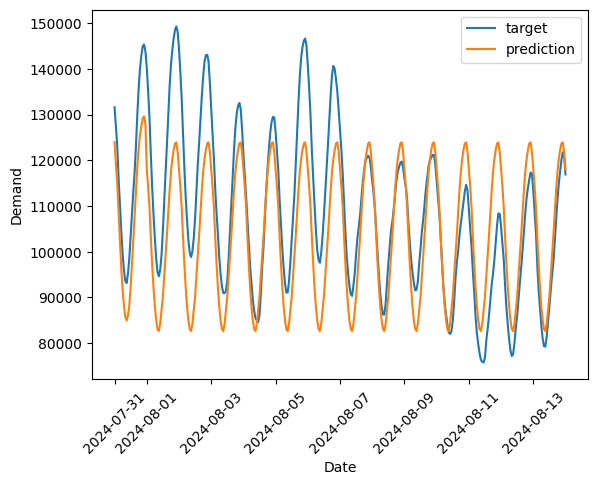

In [17]:
plt.plot(eval_df.index, eval_df.D, label='target')
plt.plot(eval_df.index, pred, label='prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Demand')
plt.legend()
plt.show()